
# Reading the Data 
**Importing python libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Supressing the warning messages**

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Reading the dataset**

In [4]:
ZomatoData=pd.read_csv("R:/DS/Ivy/Python/Python Datasets/Regression Datasets/ZomatoData.csv",encoding='latin')
print('Shape before deleting duplicate values:',ZomatoData.shape)

Shape before deleting duplicate values: (9551, 19)


**Removing duplicate values**

In [5]:
ZomatoData=ZomatoData.drop_duplicates()
print('Shape after deleting duplicate values:',ZomatoData.shape)

Shape after deleting duplicate values: (9551, 19)


*The data has no duplicate values*

# Basic Data Exploration

In [6]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [7]:
ZomatoData.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


In [8]:
ZomatoData.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

In [9]:
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


# Defining the problem statement: 
#### Predict the appropriate value of a diamond based on its characteristics
* Target Variable: Rating
* Predictors: Restaurant ID,	Restaurant Name, Country Code,	City,	Address,	Locality,	Locality Verbose,	Longitude,	Latitude,	Cuisines,	Currency,	Has Table booking,	Has Online delivery,	Is delivering now,	Switch to order menu,	Price range,	Votes,	Average Cost for two,	Rating

# Determining the type of Machine Learning Algorithm
Based on the problem statement we need to create a **supervised ML Regression model**, as the target variable is Continuous.

# Looking at the distribution of Target variable
* If target variable's distribution is too negatively skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

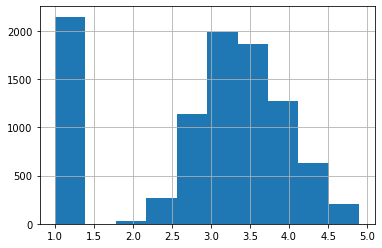

In [10]:
ZomatoData['Rating'].hist()

In [11]:
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

# Basic Data Exploration Result

Typically a categorical variable contains less than 20 Unique values

* **Restaurant ID:** Qualitative. Rejected.

* **Restaurant Name:** Qualitative. Rejected.

* **Country Code:** Categorical. Selected.

* **City:** Categorical.Rejected.Too many distinct values.

* **Address:** Qualitative. Rejected.

* **Locality:** Qualitative. Rejected.

* **Locality verbose:** Qualitative. Rejected.

* **Latitude:** Continuous. Selected.

* **Longitude:** Continuous. Selected.

* **Cuisines:** Continuous. Selected.

* **Currency:** Categorical. Rejected.

* **Has Table booking:** Categorical. Selected.

* **Has Online delivery**: Categorical. Selected.

* **Is delivering now**: Categorical. Selected.

* **Switch to order menu:** No unique values. Rejected

* **Price range**: Categorical. Selected.

* **Votes:** Continuous. Selected

* **Average Cost for two :** Continuous. Selected.

* **Rating:** Continuous. Selected. **Target Variable!**


**Renaming the columns**

In [12]:
ZomatoData.rename(columns={'Restaurant ID':'ID',
                  'Restaurant Name':'Name',
                  'Country Code':'code',
                  'Latitude':'lat',
                  'Longitude':'long',
                  'Has Table booking':'booking',
                  'Has Online delivery':'delivery',
                  'Is delivering now':'online',
                  'Price range':'price_range',
                  'Average Cost for two':'avg_cost'
                  },inplace=True)
ZomatoData.head()

,ID,Name,code,City,Address,Locality,Locality Verbose,long,lat,Cuisines,Currency,booking,delivery,online,Switch to order menu,price_range,Votes,avg_cost,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


# Feature Engineering

In [13]:
# Function to count the number of cuisines
def counter(inp):
    CuisinesNum=len(str(inp).split(','))
    return(CuisinesNum)

In [14]:
len(str(ZomatoData['Cuisines']).split(','))

13

In [15]:
# Creating a new feature in data
ZomatoData['Cuisine Count']=ZomatoData['Cuisines'].apply(counter)
ZomatoData.head()

,ID,Name,code,City,Address,Locality,Locality Verbose,long,lat,Cuisines,Currency,booking,delivery,online,Switch to order menu,price_range,Votes,avg_cost,Rating,Cuisine Count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


# Dropping unnecessary columns

In [16]:
ZomatoData.drop(['ID','City','Name','Address','Locality','Locality Verbose','Switch to order menu','Currency','Cuisines'],axis=1,inplace=True)

In [17]:
ZomatoData.head()

,code,long,lat,booking,delivery,online,price_range,Votes,avg_cost,Rating,Cuisine Count
0,162,121.027535,14.565443,Yes,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Yes,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Yes,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Yes,No,No,4,229,1500,4.8,2


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

**Categorical Predictors:** country code, city, booking, delivery, online, price_range

In [18]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotChart(InpData, CatCols):
    fig,subplot=plt.subplots(nrows=1,ncols=len(CatCols),figsize=(30,10))
    
    for ColName,PlotNum in zip(CatCols,range(len(CatCols))):
        InpData.groupby(ColName).size().plot(kind='bar',ax=subplot[PlotNum])

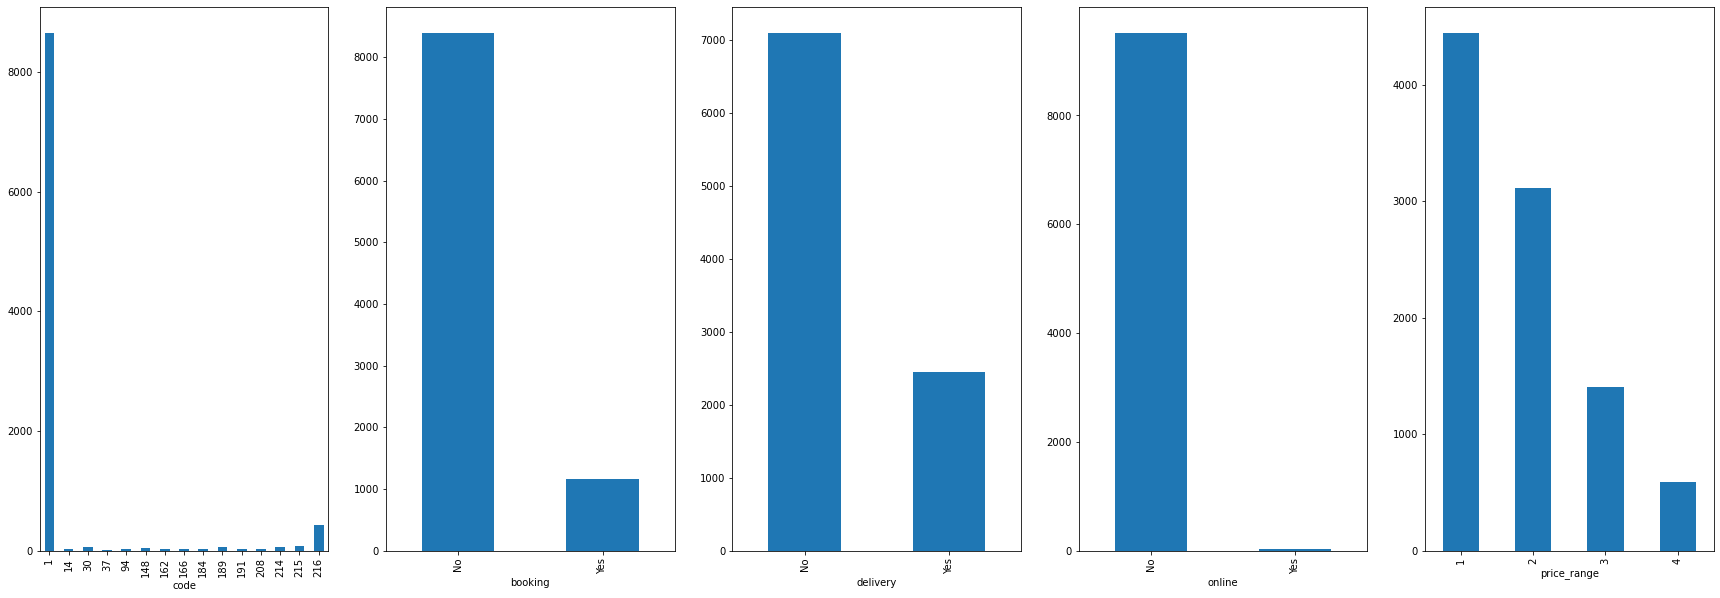

In [19]:
CatCol=['code','booking','delivery','online','price_range']

PlotChart(InpData=ZomatoData, CatCols=CatCol)

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

**code,online are too skewed. Hence rejected.**

<b>Selected Categorical Variables</b>: booking,delivery,price_range



### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, the continuous predictor variables are lat,long,Votes,avg_cost

array([[<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'avg_cost'}>]], dtype=object)

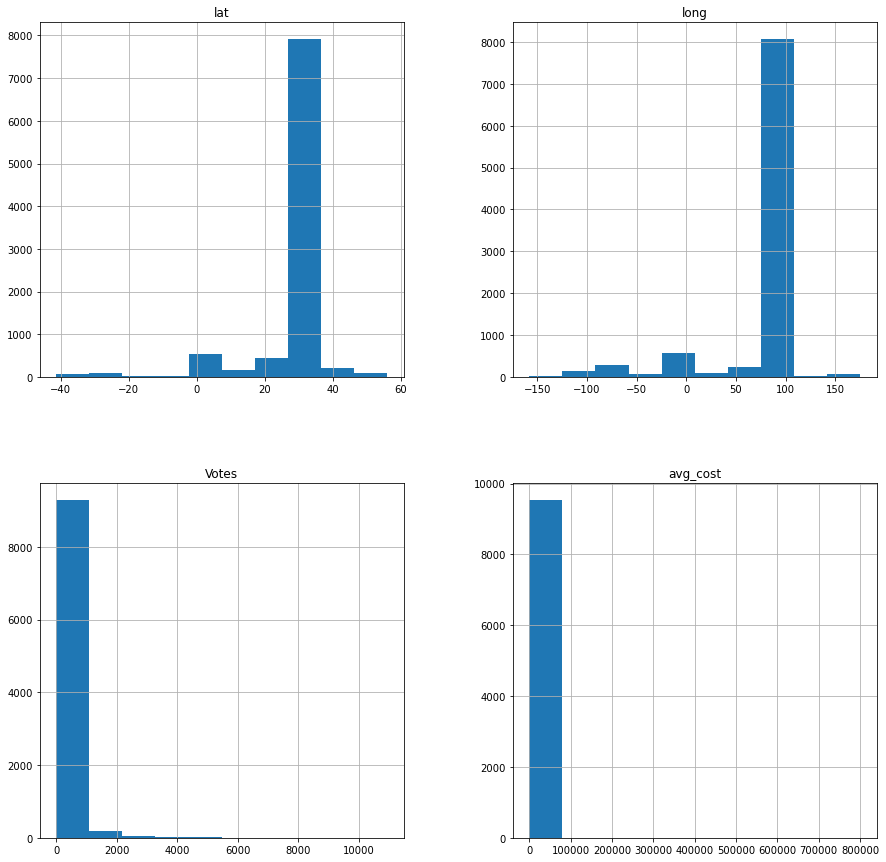

In [20]:
ContCol=['lat','long','Votes','avg_cost']
ZomatoData.hist(ContCol,figsize=(15,15))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>lat</b> : Selected. The distribution is good.
* <b>long</b>: Selected. The distribution is good.
* <b>votes</b>: Selected. The distribution is good.Outliers present.
* <b>avg_cost</b>: Selected. The distribution is good. Outliers present.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

**Treating the outliers**

In [21]:
len(ZomatoData[ZomatoData['Votes']>=4000])

19

In [22]:
ZomatoData['Votes'][ZomatoData['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

In [23]:
ZomatoData['Votes'][ZomatoData['Votes']>4000] =3986

<AxesSubplot:>

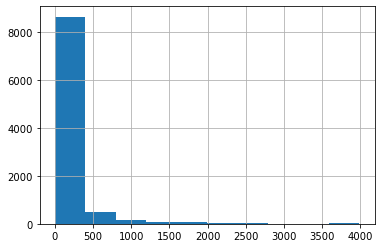

In [24]:
ZomatoData['Votes'].hist()

In [25]:
len(ZomatoData[ZomatoData['avg_cost']>=50000])

21

In [26]:
ZomatoData['avg_cost'][ZomatoData['avg_cost']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: avg_cost, Length: 9530, dtype: int64

In [27]:
ZomatoData['avg_cost'][ZomatoData['avg_cost']>50000] =8000

<AxesSubplot:>

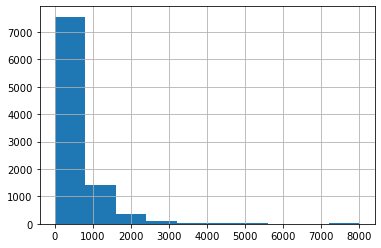

In [28]:
ZomatoData['avg_cost'].hist()

# Feature Selection (Bi-Variate analysis)
The best columns/features which are correlated to the Target Variable are estimated by measuring the correlation values or ANOVA/Chi-Square tests.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

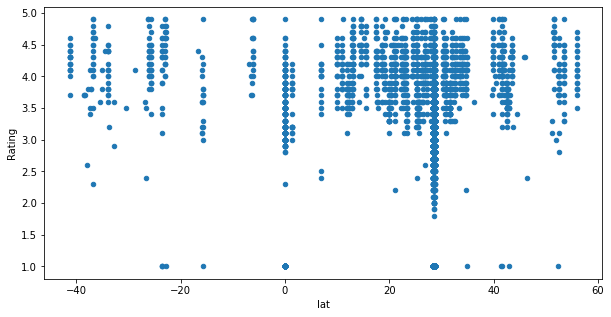

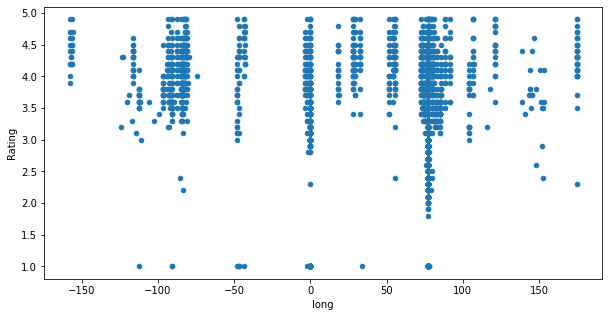

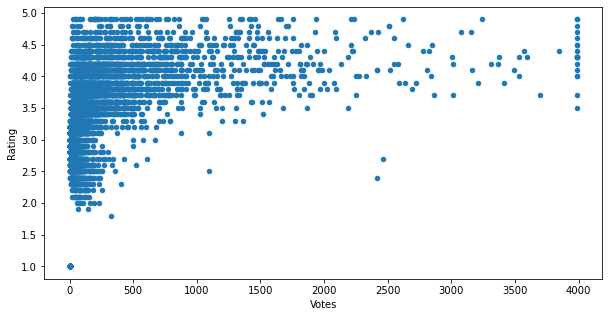

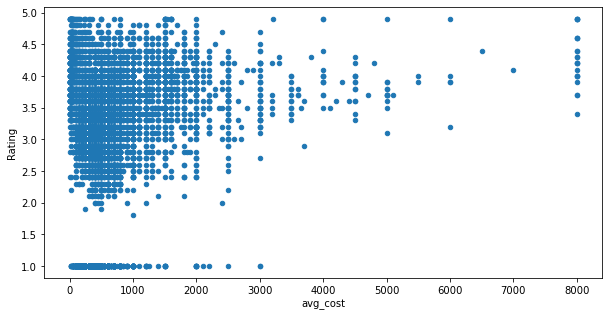

In [29]:
for pred in ContCol:
    ZomatoData.plot.scatter(x=pred,y='Rating',figsize=(10,5))

# Scatter charts interpretation

See if there is a visible trend or not. There could be three scenarios:
1. Increasing Trend:
This means both variables are positively correlated.

2. Decreasing Trend:
This means both variables are negatively correlated. 

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Correlation between (-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1) means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>

**Calculating correlation matrix**

In [30]:
Cols=['Rating','lat','long','Votes','avg_cost']
ZomatoData[Cols].corr()

,Rating,lat,long,Votes,avg_cost
Rating,1.000000,-0.019806,-0.145930,0.385249,0.248981
lat,-0.019806,1.000000,0.043207,-0.019687,-0.064748
long,-0.145930,0.043207,1.000000,-0.101381,0.210272
Votes,0.385249,-0.019687,-0.101381,1.000000,0.245662
avg_cost,0.248981,-0.064748,0.210272,0.245662,1.000000


**Final selected columns:** Rating,Votes,avg_cost

# Relationship exploration: Categorical Vs Continuous -- Box Plots

In [31]:
CatCol=['booking','delivery','price_range']

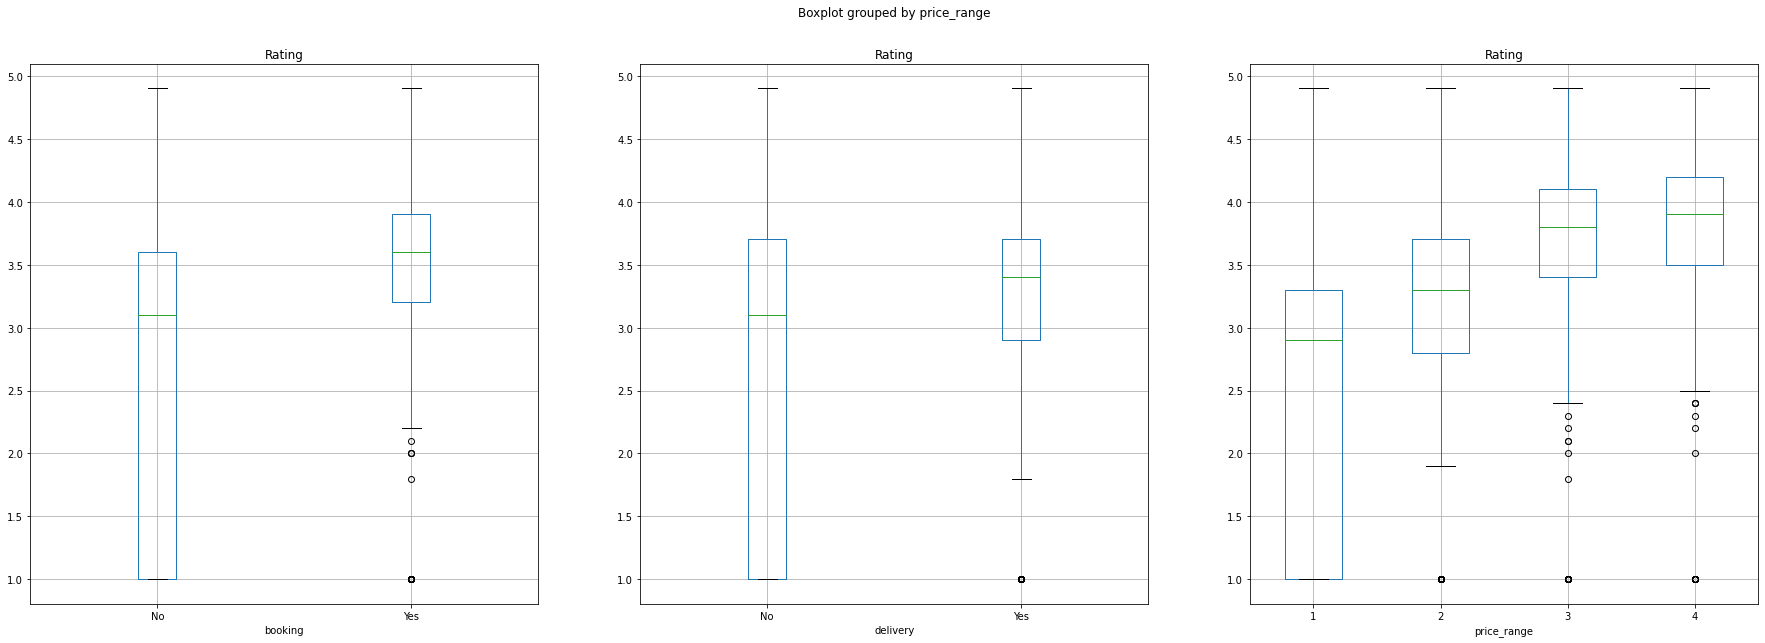

In [32]:
fig,subplot=plt.subplots(nrows=1,ncols=len(CatCol),figsize=(30,10))

for PredCol,PlotNum in zip(CatCol,range(len(CatCol))):
    ZomatoData.boxplot(by=PredCol,column='Rating',ax=subplot[PlotNum])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [33]:
from scipy.stats import f_oneway

In [34]:
def Func_Anova(InpData,TargetVariable,CatPreds):
     # Creating an empty list of final selected predictors
    SelectedPreds=[]
    
    for pred in CatPreds:
        CatColsList=InpData.groupby(pred)[TargetVariable].apply(list)
        Anova=f_oneway(*CatColsList)#unpacks the list
        
    # If the ANOVA P-Value is <0.05, that means we reject H0
        if(Anova[1]<0.05):
            print(pred,'is correlated with',TargetVariable, ' | P-value:', Anova[1])
            SelectedPreds.append(pred)
        else:
        # Accepting the H0 if the P value is more than 0.05
            print(pred,'is NOT correlated with', TargetVariable, ' | P-value:', Anova[0])
        
    return(SelectedPreds)

In [35]:
Func_Anova(InpData=ZomatoData,TargetVariable='Rating',CatPreds=CatCol)

booking is correlated with Rating  | P-value: 3.9393041304297214e-82
delivery is correlated with Rating  | P-value: 1.6952587420575958e-92
price_range is correlated with Rating  | P-value: 0.0


['booking', 'delivery', 'price_range']

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [36]:
SelectedCols=['Votes','avg_cost','booking','delivery','price_range']
final_df=ZomatoData[SelectedCols]
final_df.head()

,Votes,avg_cost,booking,delivery,price_range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


## Data Pre-processing for Machine Learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. 

In this data there is no Ordinal categorical variable which is in string format.


In [37]:
Cols=['booking','delivery']
final_df[Cols]=final_df[Cols].replace({'Yes':1,'No':0})
final_df.head()

,Votes,avg_cost,booking,delivery,price_range
0,314,1100,1,0,3
1,591,1200,1,0,3
2,270,4000,1,0,4
3,365,1500,0,0,4
4,229,1500,1,0,4


In [38]:
# Adding Target Variable to the data
final_df['Rating']=ZomatoData['Rating']

# Machine Learning: Splitting the data into Training and Testing sample

In [39]:
x=final_df[SelectedCols]
y=final_df['Rating']

# Standardization/Normalization

In [40]:
from sklearn.preprocessing import RobustScaler
PredScaler=RobustScaler().fit(x)
x=PredScaler.transform(x)

In [41]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Multiple Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [43]:
# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 score:',metrics.r2_score(y_train,lm.predict(x_train)))

R2 score: 0.29974320587145153


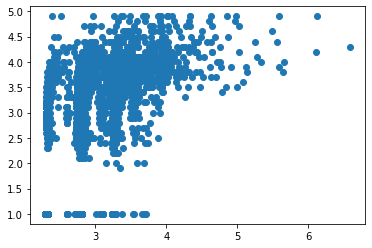

In [44]:
Prediction=lm.predict(x_test)
plt.scatter(Prediction,y_test)

In [45]:
# Calculating the error for each row
mape=np.mean(abs((Prediction-y_test)/y_test)*100)
med=np.median(abs((Prediction-y_test)/y_test)*100)

print('Mean Accuracy on test data:',100-mape)
print('Median Accuracy on test data:',100-med)

Mean Accuracy on test data: 52.836806012737824
Median Accuracy on test data: 78.61349912058846


In [46]:
# Defining a custom function to calculate average accuracy
def Acc_Score(orig,pred):
    mape=np.mean(abs((orig-pred)/orig)*100)
    return(100-mape)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
cust_score=make_scorer(Acc_Score)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
print('Average Accuracy of model:',round(cross_val_score(lm,x,y,cv=5,scoring=cust_score).mean(),2))

Average Accuracy of model: 53.77


# Decision Trees

In [76]:
from sklearn.tree import DecisionTreeRegressor
rm=DecisionTreeRegressor(max_depth=5,criterion='mse')
rm.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [77]:
# Measuring Goodness of fit in Training data
print('R2 Score:',metrics.r2_score(y_test,lm.predict(x_test)))

R2 Score: 0.3087094806656012


<AxesSubplot:>

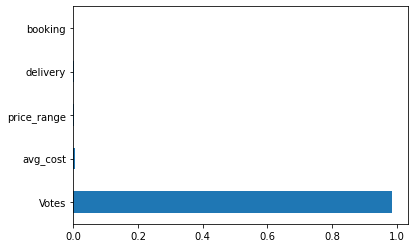

In [78]:
# Plotting the feature importance for Top 5 most important columns
pd.Series(rm.feature_importances_,index=SelectedCols).nlargest(5).plot(kind='barh')

In [79]:
prediction=rm.predict(x_test)

mape=np.mean(abs((y_test-prediction)/y_test)*100)
med=np.median(abs((y_test-prediction)/y_test)*100)

print('Mean Accuracy on test data:',100-mape)
print('Median Accuracy on test data:',100-med)
print('Average Model Accuracy:',round(cross_val_score(rm,x,y,cv=5,scoring=cust_score).mean(),2))

Mean Accuracy on test data: 92.99660892453055
Median Accuracy on test data: 96.05067064083465
Average Model Accuracy: 92.84


## Plotting a Decision Tree

In [80]:
import os
os.environ['PATH']+=os.pathsep+'C:\\Users\\eshvi\\anaconda3\\Library\\bin\\graphviz'

In [81]:
from IPython.display import Image
from sklearn import tree
import pydotplus

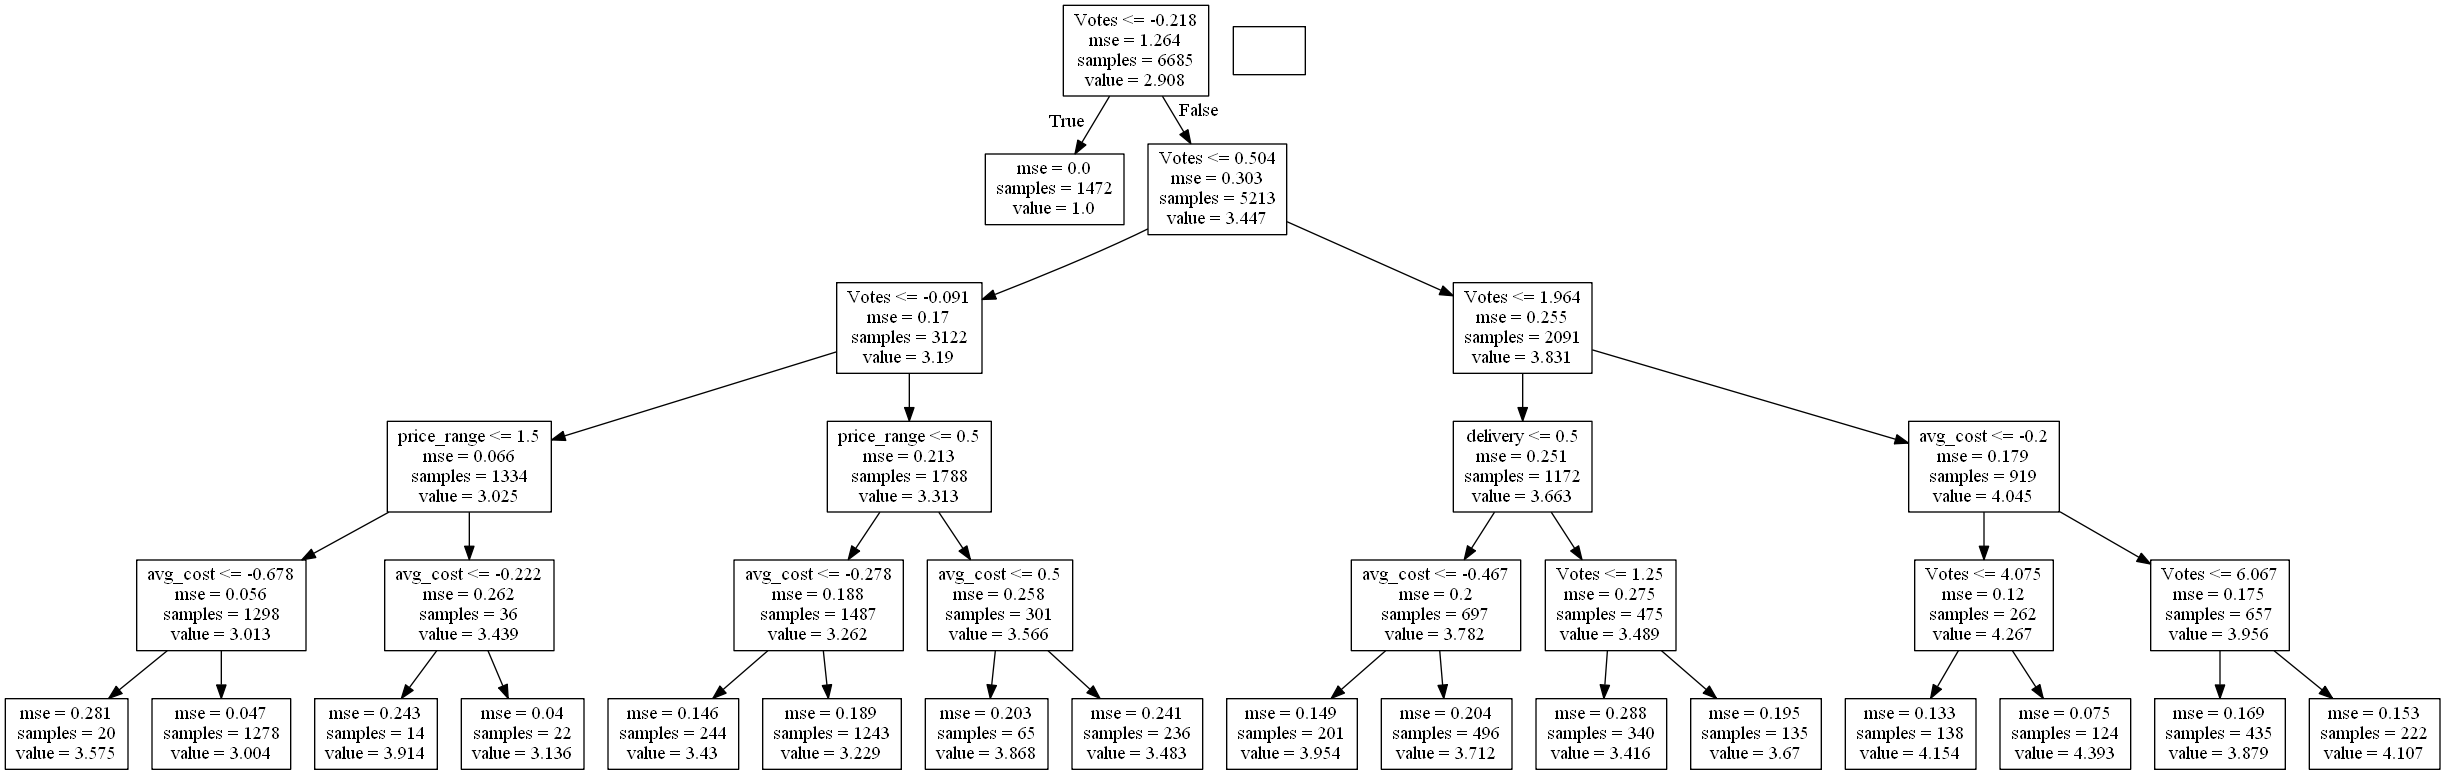

In [82]:
# Create DOT data
dot_data=tree.export_graphviz(rm,out_file=None,feature_names=SelectedCols,class_names=y)

# Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)

#Show graph
Image(graph.create_png(),width=7000,height=7000)